# Cluster-Analyse

Wendet verschiedene Cluster-Algorithmen auf die Umfragedaten an mit dem Ziel zum Schluss
"sinnvolle" (d.h. in euren Augen sinnvolle) Cluster zu bilden. Was für Cluster ergeben sich daraus
und wie wurden die Teilnehmer*innen eingeteilt? Wie musstet ihr die Daten dazu bearbeiten?

***

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb  # data visualization library  
import matplotlib.pyplot as plt  # data visualization library 

In [2]:
#Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [3]:
file_name = "./data/survery_data_annonymized_230626_clean.csv"
data = pd.read_csv(file_name)
data.head(5)

#pd.show_versions()

,Alter,Geschlecht,Pseudonym,Position,Studiengang,Sportlichkeit,Sportarten,Fav_Sportart,Gesunde_Ernaehrung,Essen_gehen,...,Yoga,Kampfsport,Tanzen,Leichtathletik,Bouldern/Klettern,Schwimmen,Wassersport,Reiten,Wintersport,Rennrad/Mountainbike
0,28,männlich,lalala-lololo,Student*in,MMI,4,Basketball;Yoga;Bouldern/Klettern;Rennrad/Moun...,Joggen/Laufen,4,3,...,1,0,0,0,1,0,0,0,0,1
1,26,männlich,hbstr,Student*in,MMI,3,Fußball;Volleyball;Yoga;Bouldern/Klettern;Renn...,Fußball,4,4,...,1,0,0,0,1,0,0,0,0,1
2,24,männlich,Panda,Student*in,MMI,2,Fußball;Handball;Yoga;Tanzen;Bouldern/Klettern,Keine Angabe,5,4,...,1,0,1,0,1,0,0,0,0,0
3,23,männlich,TomTom Navigation,Student*in,MMI,5,Leichtathletik;Bouldern/Klettern;Wintersport,Trampolin,2,4,...,0,0,0,1,1,0,0,0,1,0
4,24,weiblich,LcAbrgr,Student*in,MMI,3,Bouldern/Klettern,Bouldern/Klettern,4,3,...,0,0,0,0,1,0,0,0,0,0


In [4]:
data.columns

Index(['Alter', 'Geschlecht', 'Pseudonym', 'Position', 'Studiengang',
       'Sportlichkeit', 'Sportarten', 'Fav_Sportart', 'Gesunde_Ernaehrung',
       'Essen_gehen', 'Kochen', 'Feiern', 'Fav_Essen', 'Musik', 'Fav_Musik',
       'Lesen', 'Darstellende_Kunst', 'Filme', 'Bildende_Kunst', 'Museen',
       'Videospiele', 'Soziale_Medien', 'Technologie', 'Astronomie',
       'Naturwissenschaften', 'Soziales_Engagement', 'Soziale_Gerechtigkeit',
       'Introvertiert_Extrovertiert', 'FOMO', 'Spontan', 'Verwirrt',
       'Glücklich', 'Geduldig', 'Streitlustig', 'Abenteuerlustig',
       'Studium_Zweifel', 'Studium_Zufriedenheit', 'Akademische_Laufbahn',
       'Lerngruppe', 'Prokrastination', 'Abgaben_spaet',
       'Neugier_Lebensmittel', 'Natur', 'Verreisen', 'Handwerk',
       'Sprachnachrichten', 'Wichtigkeit_Geld', 'Geschlecht_num',
       'Position_num', 'Studiengang_num', 'Basketball', 'Fußball', 'Handball',
       'Football', 'Hockey', 'Volleyball', 'Tennis', 'Yoga', 'Kampfsport',
  

In [5]:
#Sportarten_Liste ohne Floorball
sportarten_list = ["Basketball",
              "Fußball",
              "Handball",
              "Football",
              "Hockey",
              "Volleyball",
              "Tennis",
              "Yoga",
              "Kampfsport",
              "Tanzen",
              "Leichtathletik",
              "Bouldern/Klettern",
              "Schwimmen",
              "Wassersport",
              "Reiten",
              "Wintersport",
              "Rennrad/Mountainbike"]

## Aufteilung in Kategorien

Zusätzl. Daten
- Alter
- ~Geschlecht~ (nicht numerisch)
- Geschlecht_num
- ~Pseudonym~ (nicht numerisch)
- ~Position~ (nicht numerisch)
- Position_num
- ~Studiengang~ (nicht numerisch)
- Studiengang_num

Sport
- Sportlichkeit
- ~Sportarten~ (wurden übersetzt in Num)
- sportarten_list
- ~Fav_Sportart~ (nur für NLP)

Ernährung/ Lifestyle
- Gesunde_Ernaehrung
- Essen_gehen
- Kochen
- Feiern
- ~Fav_Essen~ (nur für NLP)
- Neugier_Lebensmittel
- Natur
- Verreisen

Kultur
- Musik
- ~Fav_Musik~ (nur für NLP)
- Lesen
- Darstellende_Kunst
- Filme
- Bildende_Kunst
- Museen
- Handwerk

Technologie/Wissenschaft
- Videospiele
- Soziale_Medien
- Technologie
- Astronomie
- Naturwissenschaften

Sozial
- Soziales_Engagement
- Soziale_Gerechtigkeit
- Introvertiert_Extrovertiert
- FOMO
- Spontan
- Verwirrt
- Glücklich
- Geduldig
- Streitlustig
- Abenteuerlustig
- Sprachnachrichten

Studium/ Karriere
- Studium_Zweifel
- Studium_Zufriedenheit
- Akademische_Laufbahn
- Lerngruppe
- Prokrastination
- Abgaben_spaet
- Wichtigkeit_Geld

In [6]:
#VORBEREITUNG KATEGORIEN

# all data
# Creating a copy of data (with only numerical values, so ignore non-numerical values from above)
data_num = data.copy().select_dtypes(include='number')

data_num_without_sports = data.copy().select_dtypes(include='number')
data_num_without_sports = data_num_without_sports.drop(columns=sportarten_list)

# cleaning
#Die rauslassen, weil es einfach so wenige Unterschiede in den Daten gibt 
columns_position_num = ['Position_num']

data_num.drop(columns=columns_position_num, axis=1)
data_num_without_sports.drop(columns=columns_position_num, axis=1)


#COLUMNS CATEGORIES
# general data
columns_age = ['Alter']

columns_sex_num = ['Geschlecht_num']

columns_studiengang_num = ['Studiengang_num']


# sports
columns_sports = ['Sportlichkeit'] 
columns_sports.extend(sportarten_list)


# ernaehrung_lifestyle
columns_lifestyle = ['Gesunde_Ernaehrung', 
                     'Essen_gehen', 
                     'Kochen', 
                     'Neugier_Lebensmittel', 
                     'Feiern', 
                     'Natur', 
                     'Verreisen'
                    ] 

# kultur
columns_kultur = ['Musik', 
                  'Lesen', 
                  'Darstellende_Kunst', 
                  'Filme', 
                  'Bildende_Kunst', 
                  'Museen',
                  'Handwerk']

 
# technology
columns_tech_sci = ['Videospiele', 
                    'Soziale_Medien', 
                    'Technologie', 
                    'Astronomie', 
                    'Naturwissenschaften']


#sozial
columns_social = ['Soziales_Engagement', 
                  'Soziale_Gerechtigkeit', 
                  'Introvertiert_Extrovertiert', 
                  'FOMO', 
                  'Sprachnachrichten']
 
columns_personality = ['Spontan', 
                       'Verwirrt', 
                       'Glücklich', 
                       'Geduldig',
                      'Streitlustig', 
                      'Abenteuerlustig']


#studium/karriere
columns_studium = ['Studium_Zweifel', 
                   'Studium_Zufriedenheit', 
                   'Akademische_Laufbahn', 
                   'Lerngruppe', 
                   'Prokrastination', 
                   'Abgaben_spaet',
                   'Wichtigkeit_Geld',]


# Clustering
## K-Means

In [7]:
# allgemein Variablen
kmeans_kwargs = {
    "init": "k-means++", # chooses good seeds
    "n_init": 10,
    "max_iter": 300,
    "random_state": 0}

In [8]:
# scaling and fitting
# Scaling: hier werden die numerischen Werte umgerechnet, 
# weil wir viele absolute Werte haben die sehr unterschiedliche Bandbreiten haben
# wenn wir dann mit einem clustering-Algorithmus nach Nähe suchen, hätte das bei absoluten Werten
#Ausirkungen, weil alle Werte gleich behandelt werden und dadurch das Clustering stark verzerrt wird
# deshalb rechnen wir alle Werte runter auf eine Gauss-Verteilung, dass der Mittelwert immer bei 0 liegt

#ALL numerical columns
scaler_all = StandardScaler()
scaler_all.fit(data_num)
data_all_scaled = pd.DataFrame(scaler_all.transform(data_num),
                           columns= data_num.columns )

#numerical columns without sports
scaler_all_without_sports = StandardScaler()
scaler_all_without_sports.fit(data_num_without_sports)
data_all_without_sports_scaled = pd.DataFrame(scaler_all_without_sports.transform(data_num_without_sports),
                           columns= data_num_without_sports.columns )

In [9]:
#elbow method to find best cluster-value
# A list holds the SSE values for each k
def elbow_method(data, label):
    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)

    plt.style.use("fivethirtyeight")
    plt.plot(range(1, 11), sse)
    plt.xticks(range(1, 11))
    plt.xlabel("Number of Clusters")
    plt.ylabel("SSE " + label)
    plt.show()


# silhouette score
# A list holds the silhouette coefficients for each k
def silhouette_score(data, label):
    silhouette_coefficients = []

    # Notice you start at 2 clusters for silhouette coefficient
    for k in range(2, 11):
        kmeans_all = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans_all.fit(data_all_scaled)
        score_all = silhouette_score(data_all_scaled, kmeans_all.labels_)
        silhouette_coefficients.append(score_all)

    plt.style.use("fivethirtyeight")
    plt.plot(range(2, 11), silhouette_coefficients)
    plt.xticks(range(2, 11))
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Coefficient")
    plt.show()

def elbow_and_silhouette(data, label):
    elbow_method(data, label)
    silhouette_score(data, label)

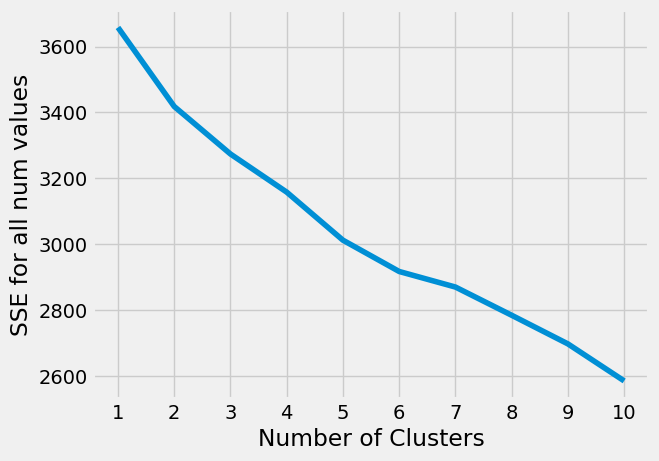

In [ ]:
label_all= "for all num values"
elbow_and_silhouette(data_all_scaled, label_all)

label_all_without_sports = "for all num values without sports"
elbow_and_silhouette(data_all_without_sports_scaled, label_all_without_sports)

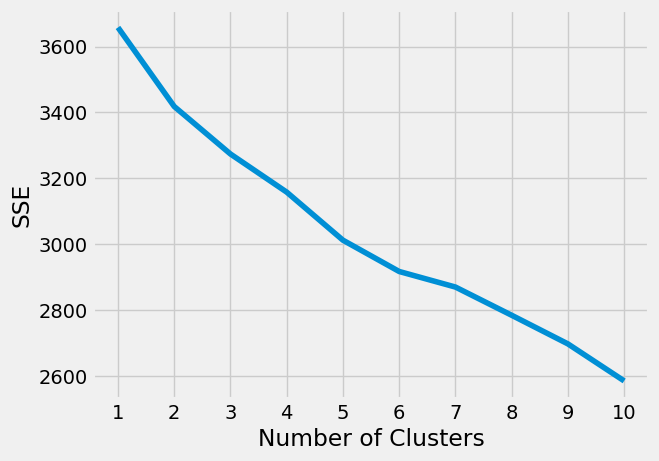

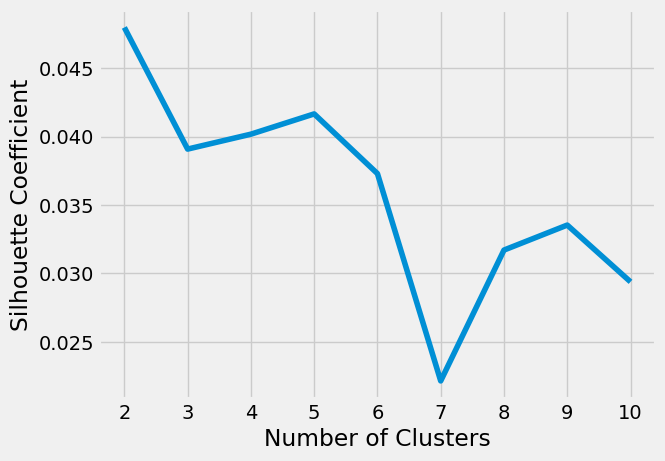

In [9]:
#elbow method to find best cluster-value
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans_all = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans_all.fit(data_all_scaled)
    sse.append(kmeans_all.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


# silhouette score
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans_all = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans_all.fit(data_all_scaled)
    score_all = silhouette_score(data_all_scaled, kmeans_all.labels_)
    silhouette_coefficients.append(score_all)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()